In [33]:
# imports

from bs4 import BeautifulSoup
import lxml.html as lh
import pandas as pd
import numpy as np
import requests 
import seaborn as sns
import matplotlib.pyplot as plt




import data

In [34]:
#bom
bom=pd.read_csv("bom.movie_gross.csv.gz") # 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
bom.info()
bom.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [35]:
#imdb

imdb_name=pd.read_csv('imdb.name.basics.csv.gz') # nconst', 'primary_name', 'birth_year', 'death_year','primary_profession', 'known_for_titles'
imdb_name.columns
imdb_aka=pd.read_csv('imdb.title.akas.csv.gz') # title_id', 'ordering', 'title', 'region', 'language', 'types','attributes', 'is_original_title
imdb_aka.columns
imdb_basics=pd.read_csv('imdb.title.basics.csv.gz') # tconst', 'primary_title', 'original_title', 'start_year','runtime_minutes', 'genres'
imdb_basics.columns
imdb_crew=pd.read_csv('imdb.title.crew.csv.gz') # tconst', 'directors', 'writers
imdb_crew.columns
imdb_prin=pd.read_csv('imdb.title.principals.csv.gz') # tconst', 'ordering', 'nconst', 'category', 'job', 'characters
imdb_prin.columns
imdb_rating=pd.read_csv('imdb.title.ratings.csv.gz') # tconst', 'averagerating', 'numvotes
imdb_rating.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [36]:
#rt
rt_info=pd.read_csv('rt.movie_info.tsv.gz', sep='\t', encoding='latin_1') # id', 'synopsis', 'rating', 'genre', 'director', 'writer','theater_date', 'dvd_date', 'currency', 'box_office', 'runtime','studio
rt_info.columns
rt_review=pd.read_csv('rt.reviews.tsv.gz',sep='\t', encoding='latin_1') # id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher','date'
rt_review.columns
rt_review


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [56]:
#tmdb
tmdb_movie=pd.read_csv('tmdb.movies.csv.gz') # genre_ids', 'id', 'original_language', 'original_title','popularity', 'release_date', 'title', 'vote_average', 'vote_count
tmdb_movie.columns
tmdb_movie


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
#tn
tn_budget=pd.read_csv('tn.movie_budgets.csv.gz') # id', 'release_date', 'movie', 'production_budget', 'domestic_gross','worldwide_gross'
tn_budget.info()
tn_budget.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

data merge/cleaning



In [9]:
bom #not much data so ignore




,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Text(0.5, 1.0, 'Avg. Rating vs Rumtime(minutes)')

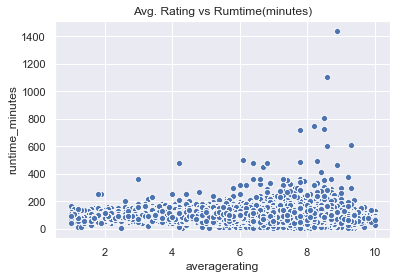

In [187]:
#imdb

#merge tconst df's

imdb1=pd.merge(imdb_crew,imdb_prin,how='outer',on='tconst') #merge crew and prin on tconst
# imdb1
imdb2=pd.merge(imdb1,imdb_rating,how='outer',on='tconst')#merge imdb1 and rating on tconst
# imdb2
imdb3= pd.merge(imdb2,imdb_basics,how='outer',on='tconst') #merge imdb2 and basics on tconst
#imdb3
imdb_aka #title_id should = tconst
imdb4= pd.merge(imdb3,imdb_aka,how='outer',left_on= 'tconst', right_on='title_id')
imdb4
imdb4.info
# no box office or budget info so use rating as proxy

# compare time and avg rating in new dataframe
time_v_rating=imdb4.loc[:,['averagerating','runtime_minutes']]
time_v_rating=time_v_rating.dropna()
time_v_rating

#get their correlation
time_rating=np.corrcoef(time_v_rating['averagerating'], time_v_rating['runtime_minutes'])
time_rating
time_rating_cor=time_rating[0][1] # correlation=0.026
time_rating_cor

# graph results
# sns.scatterplot(x=time_v_rating['averagerating'],y=time_v_rating['runtime_minutes'])
time_v_rating_abrdg=time_v_rating[time_v_rating['runtime_minutes']<10000] # exclude 2 biggest outliers
sns.scatterplot(x=time_v_rating_abrdg['averagerating'],y=time_v_rating_abrdg['runtime_minutes']).set_title('Avg. Rating vs Rumtime(minutes)')  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


217

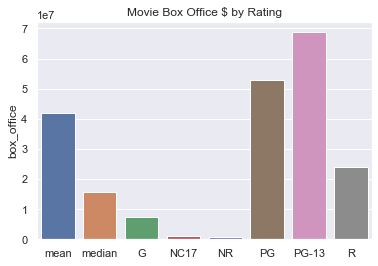

In [157]:
#rt
rt_info
rt_review

#rt info cleaning
# rt_info.info()
rt_info_na=rt_info.dropna()
rt_info_na.info()
rt_info_na. columns # id', 'synopsis', 'rating', 'genre', 'director', 'writer','theater_date', 'dvd_date', 'currency', 'box_office', 'runtime','studio'
rt_info_na['box_office']=rt_info_na['box_office'].str.replace(',','').astype(float)

# rt_info_na.info()
rating_box_office=rt_info_na.groupby('rating').mean()
# rt_info_na.describe()
rt_info_na_dist=rt_info_na.describe().iloc[[1,5]]
# rt_info_na_dist
# rating_box_office
rating_data=pd.concat([rt_info_na_dist,rating_box_office])
rating_data=rating_data.drop('id',axis=1)

rating_data=rating_data.rename(index={'50%':'median'})
sns.barplot(x=rating_data.index,y=rating_data['box_office']).set_title('Movie Box Office $ by Rating')


rt_review
rt_review['rating']


num_directors=len(rt_info_na['director'].unique()) # not enogh data
num_directors

# rt_data=pd.merge(rt_info,rt_review,how='outer',on='id')
# rt_data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2385 non-null   int64  
 1   genre_ids          2385 non-null   object 
 2   id_x               2385 non-null   int64  
 3   original_language  2385 non-null   object 
 4   original_title     2385 non-null   object 
 5   popularity         2385 non-null   float64
 6   release_date_x     2385 non-null   object 
 7   title              2385 non-null   object 
 8   vote_average       2385 non-null   float64
 9   vote_count         2385 non-null   int64  
 10  id_y               2385 non-null   int64  
 11  release_date_y     2385 non-null   object 
 12  movie              2385 non-null   object 
 13  production_budget  2385 non-null   object 
 14  domestic_gross     2385 non-null   object 
 15  worldwide_gross    2385 non-null   object 
dtypes: float64(2), int64(4),

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,return%
vote_average,
3.3,-100.000000
4.0,-23.687192
4.1,90.530654
4.2,69.642556
4.3,-37.427759
4.4,211.647470
4.5,200.295849
4.6,-30.926980
4.7,1859.168000


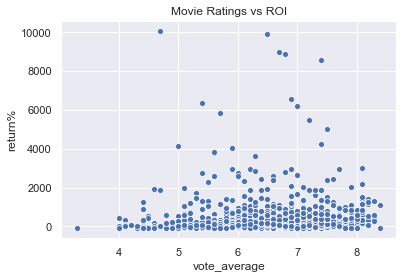

In [156]:
#tmdb

# tmdb_movie
# tn_budget
# tmdb_movie.info()
# tn_budget.info()
m1=pd.merge(tmdb_movie,tn_budget ,left_on= 'original_title', right_on='movie')
m2=pd.merge(tmdb_movie,tn_budget ,left_on= 'title', right_on='movie')
m1 #2316 results
m2 #2385 results
tmdb_movie_budgets=m2

 # get movies with at least 100 votes
tmdb_movie_budgets.info()
tmdb_movie_budgets=tmdb_movie_budgets[tmdb_movie_budgets['vote_count']>100]

# convert financial data to numbers(ints/floats)
# rt_info_na['box_office']=rt_info_na['box_office'].str.replace(',','').astype(float)

tmdb_movie_budgets['production_budget']=tmdb_movie_budgets['production_budget'].str.replace(',','').str.replace('$','').astype(float)
tmdb_movie_budgets['worldwide_gross'] = tmdb_movie_budgets['worldwide_gross'].str.replace(',','').str.replace('$','').astype(float)
tmdb_movie_budgets['return%']= ((tmdb_movie_budgets['worldwide_gross']/tmdb_movie_budgets['production_budget'])-1)*100

tmdb_movie_budgets.info()
tmdb_movie_budgets
# cor=np.corrcoef(tmdb_movie_budgets['vote_count'],tmdb_movie_budgets['vote_average'])
# cor
rating_roi=tmdb_movie_budgets.loc[:,['vote_average','return%']]
correl=np.corrcoef(rating_roi['vote_average'],rating_roi['return%'])
correl=correl[0][1] 
correl # 0.030784734541907957 effectivly no correlation



# v_r=sns.scatterplot(x=rating_roi['vote_average'],y=rating_roi['return%'])
rating_roi2=rating_roi[rating_roi['return%']<20000] # exclude 2 outlier data points
v_r2=sns.scatterplot(x=rating_roi2['vote_average'],y=rating_roi2['return%']).set_title('Movie Ratings vs ROI')



asdf=rating_roi2.groupby('vote_average').mean()
asdf2=rating_roi2.groupby('vote_average').median()

asdf2






In [158]:
#Get market share data from wikipedia

market_share=pd.read_html('https://en.wikipedia.org/wiki/Major_film_studios')

market_table=pd.concat([market_share[0],market_share[1]],ignore_index=True)
market_table_col=list(market_table.columns)
del market_table_col[0:2]
del market_table_col[-1]
del market_table_col[-3]


market_table=market_table.drop(columns=market_table_col)
market_table=market_table.rename({'Studio parent(conglomerate)':'Studio','Major film studio unit Secondary studio':'subsidiaries','US/CA market share (2019)':'market_share[2019]'},axis='columns')


market_table['market_share[2019]'][5]='7.07%'

market_table=market_table.drop(columns='US/CA market share (2019)[18]')
market_table=market_table.drop(index=list(range(6,13)))


market_table['market_share[2019]']= [i[:-1] for i in market_table['market_share[2019]']]
market_table['market_share[2019]'] = market_table['market_share[2019]'].astype(float)

market_table

,Studio,subsidiaries,market_share[2019]
0,NBCUniversal(Comcast),Universal Pictures,11.50
1,ViacomCBS(National Amusements),Paramount Pictures,5.00
2,WarnerMedia(AT&T),Warner Bros. New Line Cinema,13.90
3,Walt Disney Studios(The Walt Disney Company),Walt Disney Pictures 20th Century Studios,33.50
4,Sony Pictures(Sony),Columbia Pictures TriStar Pictures,12.10
5,Lionsgate Motion Picture Group(Lionsgate)[19][...,NaN,7.07


,Net_margin,Operating_margin,Return_on_assets,Return_on_equity
Microsoft,30.96,37.03,11.26,40.14
Comcast,10.91,19.03,4.80,14.19
ViacomCBS,5.16,15.75,6.96,16.42
AT&T,6.84,16.74,3.35,6.80
Disney,-1.58,9.43,1.97,-0.87
Sony,7.99,0.00,2.37,14.72
Lions_Gate,-2.23,4.96,1.43,-3.47


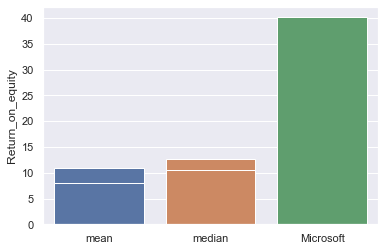

In [165]:
# More details on top movie studios


top_companies=['msft','cmcsa','viac','t','dis','sne','lgf-a'] #ticker symbols for top studios

net={'Net_margin':[]}
operating={'Operating_margin':[]}
roa={'Return_on_assets':[]}
roe={'Return_on_equity':[]}





for i in top_companies: # get net and operating margins and ROA and ROE for all 'top companies'
  site= 'https://finance.yahoo.com/quote/'+i+'/key-statistics?p='+i
  tables=pd.read_html(site)
  temp=tables[5]
  net['Net_margin'].append(temp[1][0])
  operating['Operating_margin'].append(temp[1][1])
  temp=tables[6]
  roa['Return_on_assets'].append(temp[1][0])
  roe['Return_on_equity'].append(temp[1][1])


margins = dict(net, **operating,**roa,**roe)

#turn all the above data into a dataframe
data=pd.DataFrame(margins,index=['Microsoft','Comcast','ViacomCBS','AT&T','Disney','Sony','Lions_Gate']) 

# convert the data to floats
for j in data.columns:
  data[j]= [i[:-1] for i in data[j]]
  data[j]=data[j].astype(float)

# add mean and median descriptive statistics
comps=data.iloc[1:].describe().iloc[1:]
comps2=comps.append(data.iloc[0])
comps2

comps3=comps2.iloc[[0,4,-1]]
comps4=comps3.rename(index={'50%':'median'})
comps4

# bar graphs comparing them all
sns.barplot(x=comps4.index,y=comps3['Net_margin'])
sns.barplot(x=comps4.index,y=comps3['Operating_margin'])
sns.barplot(x=comps4.index,y=comps3['Return_on_assets'])
sns.barplot(x=comps4.index,y=comps3['Return_on_equity'])
data
